<a href="https://colab.research.google.com/github/a2r4vind/Machine-Learning-Models/blob/main/Comparing_Optimizers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization in Deep Learning: Comparing Optimizers

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adagrad, RMSprop, Adam

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train.astype('float32')/255.0, x_test.astype('float32')/255.0
y_train, y_test = tf.keras.utils.to_categorical(y_train, 10), tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Simple feedforward neural network

In [4]:
def create_model(optimizer):
  model = Sequential(
      [
          Flatten(input_shape=(28,28)),
          Dense(128, activation='relu'),
          Dense(10, activation='softmax')
      ]
  )
  model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

# List of optimizers to compare

In [5]:
optimizers = {
    'SGD': SGD(),
    'SGD with Momentum': SGD(momentum=0.9),
    'Adagrad': Adagrad(),
    'RMSprop': RMSprop(),
    'Adam': Adam()

}

# Train and evaluate the model with each optimizer

In [6]:
history_dict = {}
for name, optimizer in optimizers.items():
  print(f'Training with {name} optimizer')
  model = create_model(optimizer)
  history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)
  history_dict[name] = history

Training with SGD optimizer


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7168 - loss: 1.1090 - val_accuracy: 0.9007 - val_loss: 0.3769
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8931 - loss: 0.3869 - val_accuracy: 0.9150 - val_loss: 0.3091
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9106 - loss: 0.3182 - val_accuracy: 0.9208 - val_loss: 0.2812
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9172 - loss: 0.2916 - val_accuracy: 0.9280 - val_loss: 0.2582
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9230 - loss: 0.2711 - val_accuracy: 0.9308 - val_loss: 0.2426
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9297 - loss: 0.2466 - val_accuracy: 0.9358 - val_loss: 0.2295
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9330 - loss: 0.2324 - val_accuracy: 0.9398 - val_loss: 0.2161
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9398 - loss: 0.2139 - 

# Plot training loss and validation loss for each optimizer

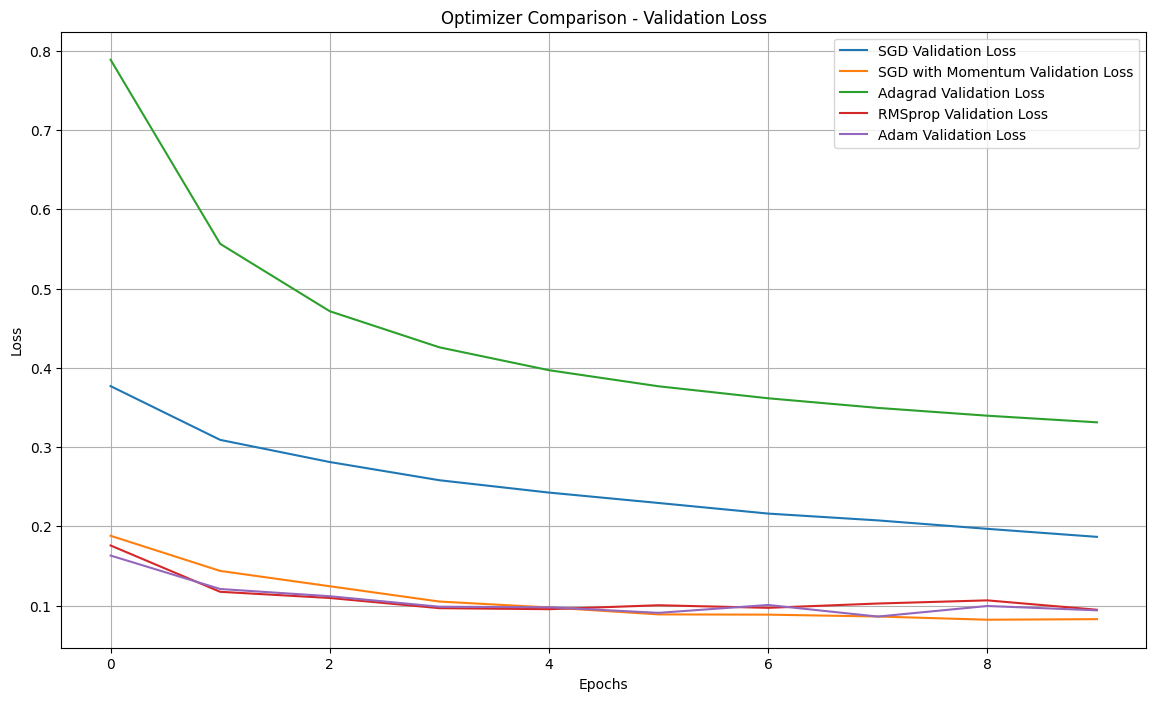

In [7]:
plt.figure(figsize=(14,8))
for name, history in history_dict.items():
  plt.plot(history.history['val_loss'], label=f'{name} Validation Loss')
plt.title('Optimizer Comparison - Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

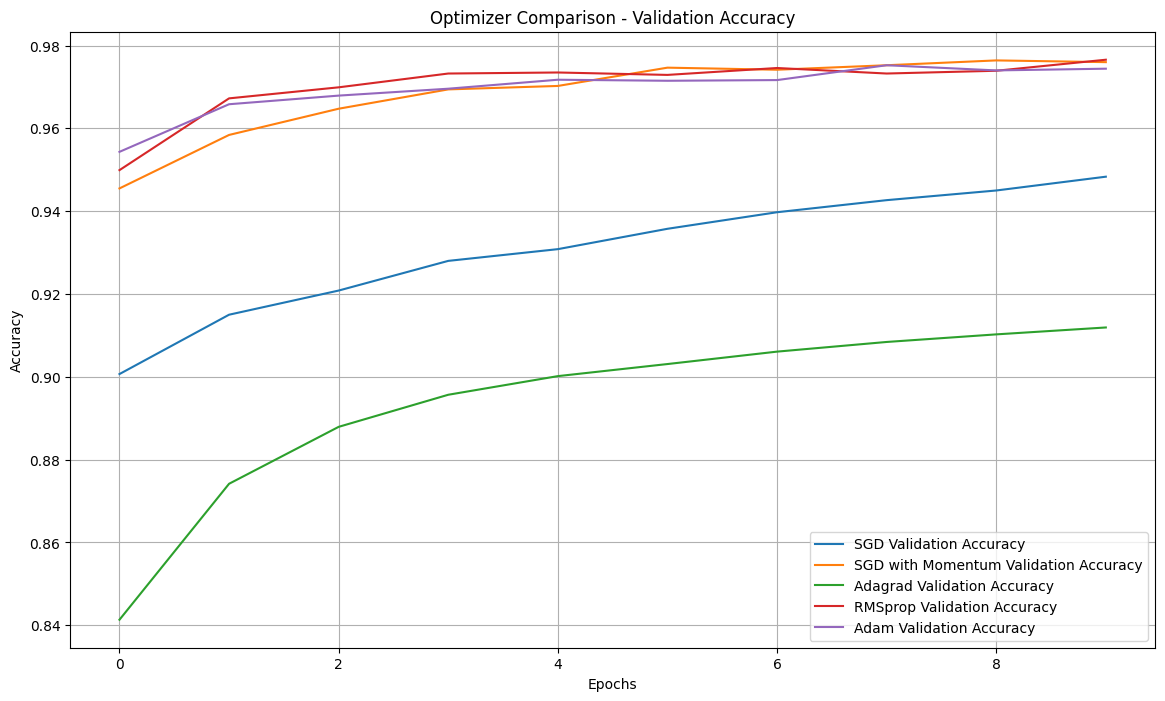

In [8]:
plt.figure(figsize=(14,8))
for name, history in history_dict.items():
  plt.plot(history.history['val_accuracy'], label=f'{name} Validation Accuracy')
plt.title('Optimizer Comparison - Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()